# Table of Contents
## I- Introduction

         Explain the purpose of the notebook and the dataset being cleaned
         Import necessary libraries
         Importing Data 

## II- Exploring the Data
         Check the shape of the dataset
         Preview the data using head(), tail(), and sample()
         Check for missing values
         Check data types
         Check for duplicates

## III- Cleaning the Data
         Remove irrelevant columns
         Rename columns for clarity
         Handle missing data (e.g., impute or drop rows/columns)
         Handle duplicates
         Handle inconsistent data (e.g., capitalization, spelling errors, etc.)
         Convert data types

## IV- Visualizing the Data
         Use plots and graphs to better understand the data and identify any outliers 
## V- Exporting the Cleaned Data
         Save the cleaned dataset as a new file

## VI- Conclusion
         Summarize the cleaning process and any insights gained from the analysis

# I- Introduction

###  Explain the purpose of the notebook and the dataset being cleaned
The purpose of this Jupyter notebook is to clean a dataset containing job offers. The dataset includes various features such as job Post, job description, company name, location, and salary. The dataset is being cleaned in order to prepare it for analysis and modeling. Cleaning the data will involve handling missing values, removing irrelevant columns, and addressing any inconsistencies in the data. Once the data is cleaned, it will be easier to analyze the characteristics of the job offers and extract insights such as the most common job titles, the distribution of salaries, and the most common locations for job offers. These insights can be used to inform various stakeholders, such as job seekers, companies, and policymakers.

### Import necessary libraries

In [38]:
pip install wordcloud


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Importing Data 

In [66]:
df = pd.read_csv('FinalDataset.csv')

In [67]:
df

,Job post,Company name,Job description,Required skills,Location,Salary,Company rating,Company review,Experience required
0,Information Technology Executive,Marriott,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,Bhopal,Not disclosed,4.2,(2907 Reviews),0-3 Yrs
1,Associate Director-Information Technology(SAP),Unacademy,Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,"Noida, Greater Noida",Not disclosed,3.4,(544 Reviews),5-15 Yrs
2,Lead - Information Technology,EchoIndia,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,Delhi / NCR,Not disclosed,4.0,(20 Reviews),11-13 Yrs
3,Information Technology - Project Manager,Tata International,Should be able to manage a project using vario...,project management\nit projects\ninformation t...,Mumbai (All Areas),Not disclosed,4.1,(287 Reviews),4-8 Yrs
4,Information Technology Trainee,Stefanini,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,Noida,Not disclosed,3.8,(75 Reviews),2-7 Yrs
...,...,...,...,...,...,...,...,...,...
49709,Site Reliability Engineer,Sky Solutions,Primary Skills: 1. Good hands on experience on...,NaN,"Malvern, PA",NaN,NaN,NaN,NaN
49710,Senior Site Reliability Engineer,Zillow,About The Team The SRE team at Zillow Group em...,NaN,United States,NaN,NaN,NaN,NaN
49711,Sr. Site Reliability Engineer,PlayStation,PlayStation isn’t just the Best Place to Play ...,NaN,"San Diego, CA","$129,000.00/yr - $162,000.00/yr",NaN,NaN,NaN
49712,Site Reliability / DevOps Engineer (Remote),Flowspace,NaN,NaN,"Los Angeles, CA",NaN,NaN,NaN,NaN


# Exploring the Data

In [42]:
# Check the shape of the dataset
print("Data shape:", df.shape)

Data shape: (49714, 9)


In [43]:
# Preview the data using head(), tail(), and sample()
print("First 5 rows:")
df.head()

First 5 rows:


,Job post,Company name,Job description,Required skills,Location,Salary,Company rating,Company review,Experience required
0,Information Technology Executive,Marriott,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,Bhopal,Not disclosed,4.2,(2907 Reviews),0-3 Yrs
1,Associate Director-Information Technology(SAP),Unacademy,Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,"Noida, Greater Noida",Not disclosed,3.4,(544 Reviews),5-15 Yrs
2,Lead - Information Technology,EchoIndia,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,Delhi / NCR,Not disclosed,4.0,(20 Reviews),11-13 Yrs
3,Information Technology - Project Manager,Tata International,Should be able to manage a project using vario...,project management\nit projects\ninformation t...,Mumbai (All Areas),Not disclosed,4.1,(287 Reviews),4-8 Yrs
4,Information Technology Trainee,Stefanini,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,Noida,Not disclosed,3.8,(75 Reviews),2-7 Yrs


In [44]:
print("Last 5 rows:")
df.tail()

Last 5 rows:


,Job post,Company name,Job description,Required skills,Location,Salary,Company rating,Company review,Experience required
49709,Site Reliability Engineer,Sky Solutions,Primary Skills: 1. Good hands on experience on...,NaN,"Malvern, PA",NaN,NaN,NaN,NaN
49710,Senior Site Reliability Engineer,Zillow,About The Team The SRE team at Zillow Group em...,NaN,United States,NaN,NaN,NaN,NaN
49711,Sr. Site Reliability Engineer,PlayStation,PlayStation isn’t just the Best Place to Play ...,NaN,"San Diego, CA","$129,000.00/yr - $162,000.00/yr",NaN,NaN,NaN
49712,Site Reliability / DevOps Engineer (Remote),Flowspace,NaN,NaN,"Los Angeles, CA",NaN,NaN,NaN,NaN
49713,Site Reliability Engineer,Adobe,Our Company Changing the world through digital...,NaN,"Austin, TX",NaN,NaN,NaN,NaN


In [45]:
print("Random 5 rows:")
df.sample(5)

Random 5 rows:


,Job post,Company name,Job description,Required skills,Location,Salary,Company rating,Company review,Experience required
3756,Senior Software Engineer,L&T Infotech (LTI),Should be able to work on development activiti...,Perl\nCore\nRDBMS\ncommunication\nPL - SQL\nLi...,Hyderabad/Secunderabad,Not disclosed,3.9,(3292 Reviews),4-7 Yrs
39889,EPIC Application Support Engineer,Accenture,Technical Experience : Responsible for working...,Application support\nConsulting\nBilling\nDesi...,Hyderabad/Secunderabad,Not disclosed,4.1,(26567 Reviews),4-6 Yrs
45774,Software Test Engineer II,Cox Automotive Inc.,NaN,NaN,"Groton, CT",NaN,NaN,NaN,NaN
30745,Data and Analytics Manager,K.A.T.N d/b/a Texas Tool Belt,Texas Tool Belt is hiring a Data and Analytics...,NaN,"Houston, TX",$55K-$117K (Glassdoor est.),NaN,NaN,NaN
39554,Sr . Assoc - Software Development,Sutherland Global Services Inc,seeking an attentive and goal-oriented person ...,Automation\njQuery\nCoding\nXML\nMySQL\nHealth...,Hyderabad/Secunderabad,Not disclosed,3.9,(4499 Reviews),4-9 Yrs


In [46]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 71027


In [47]:
# Check data types
print("Data types:")
print(df.dtypes)

Data types:
Job post                object
Company name            object
Job description         object
Required skills         object
Location                object
Salary                  object
Company rating         float64
Company review          object
Experience required     object
dtype: object


In [48]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 6070


In [49]:
# Check the distribution of categorical features
categorical_features = ["Job post", "Company name", "Location"]
for feature in categorical_features:
    print("Distribution of", feature)
    value_counts = df[feature].value_counts(normalize=True)
    table = pd.DataFrame({feature: value_counts.index, "Count": value_counts.values})
    print(table)

Distribution of Job post
                                          Job post     Count
0                                Software Engineer  0.032727
1                                   Data Scientist  0.025969
2                         Senior Software Engineer  0.022529
3                                     Data Analyst  0.015468
4                        Machine Learning Engineer  0.011566
...                                            ...       ...
21476                       Senior US IT Recruiter  0.000020
21477                 Senior US IT Recruiters (W2)  0.000020
21478                         Senior Software Lead  0.000020
21479       HELP DESK Associate / Senior Associate  0.000020
21480  Site Reliability / DevOps Engineer (Remote)  0.000020

[21481 rows x 2 columns]
Distribution of Company name
                Company name     Count
0                  Accenture  0.049625
1                        IBM  0.029972
2                  Microsoft  0.019250
3                      Apple  0.

In [50]:
# Summary statistics for numerical columns
print("Summary statistics:\n", df.describe())

Summary statistics:
        Company rating
count    34418.000000
mean         3.959312
std          0.627616
min         -1.000000
25%          3.800000
50%          4.100000
75%          4.200000
max          5.000000


In [51]:
# Check the distribution of numerical features

# Salary
numerical_features = ["Salary"]
for feature in numerical_features:
    print("Distribution of", feature)
    print(df[feature].describe())
    
# Company rating
    numerical_features = ["Company rating"]
for feature in numerical_features:
    print("Distribution of", feature)
    print(df[feature].describe())

Distribution of Salary
count             42610
unique             2751
top       Not disclosed
freq              30137
Name: Salary, dtype: object
Distribution of Company rating
count    34418.000000
mean         3.959312
std          0.627616
min         -1.000000
25%          3.800000
50%          4.100000
75%          4.200000
max          5.000000
Name: Company rating, dtype: float64


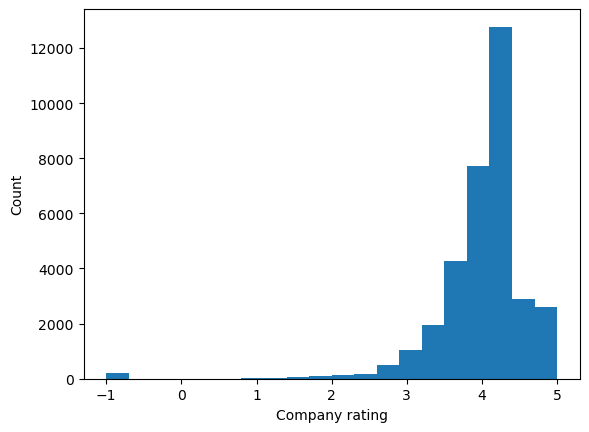

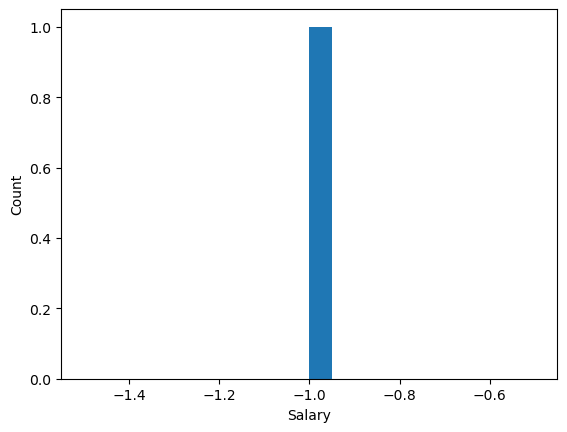

In [52]:
# Replace non-numeric strings in "Company rating" column with NaN values
df['Company rating'] = pd.to_numeric(df['Company rating'], errors='coerce')

# Replace non-numeric strings in "Salary" column with NaN values
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Visualize the distribution of numerical values in "Company rating" column
plt.hist(df['Company rating'].dropna(), bins=20)
plt.xlabel('Company rating')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of numerical values in "Salary" column
plt.hist(df['Salary'].dropna(), bins=20)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

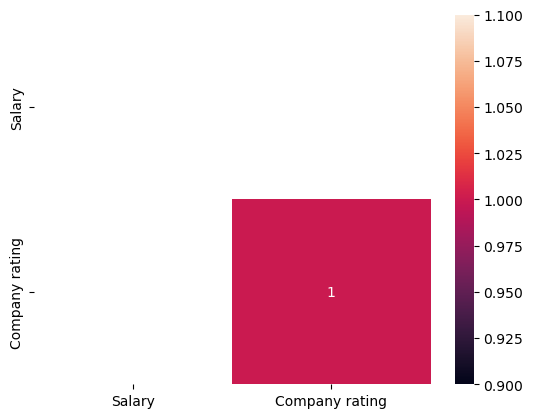

In [53]:
# Check for correlations between numerical columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [54]:
# Calculate correlation matrix
corr_matrix=df.corr()
corr_matrix

,Salary,Company rating
Salary,NaN,NaN
Company rating,NaN,1.0


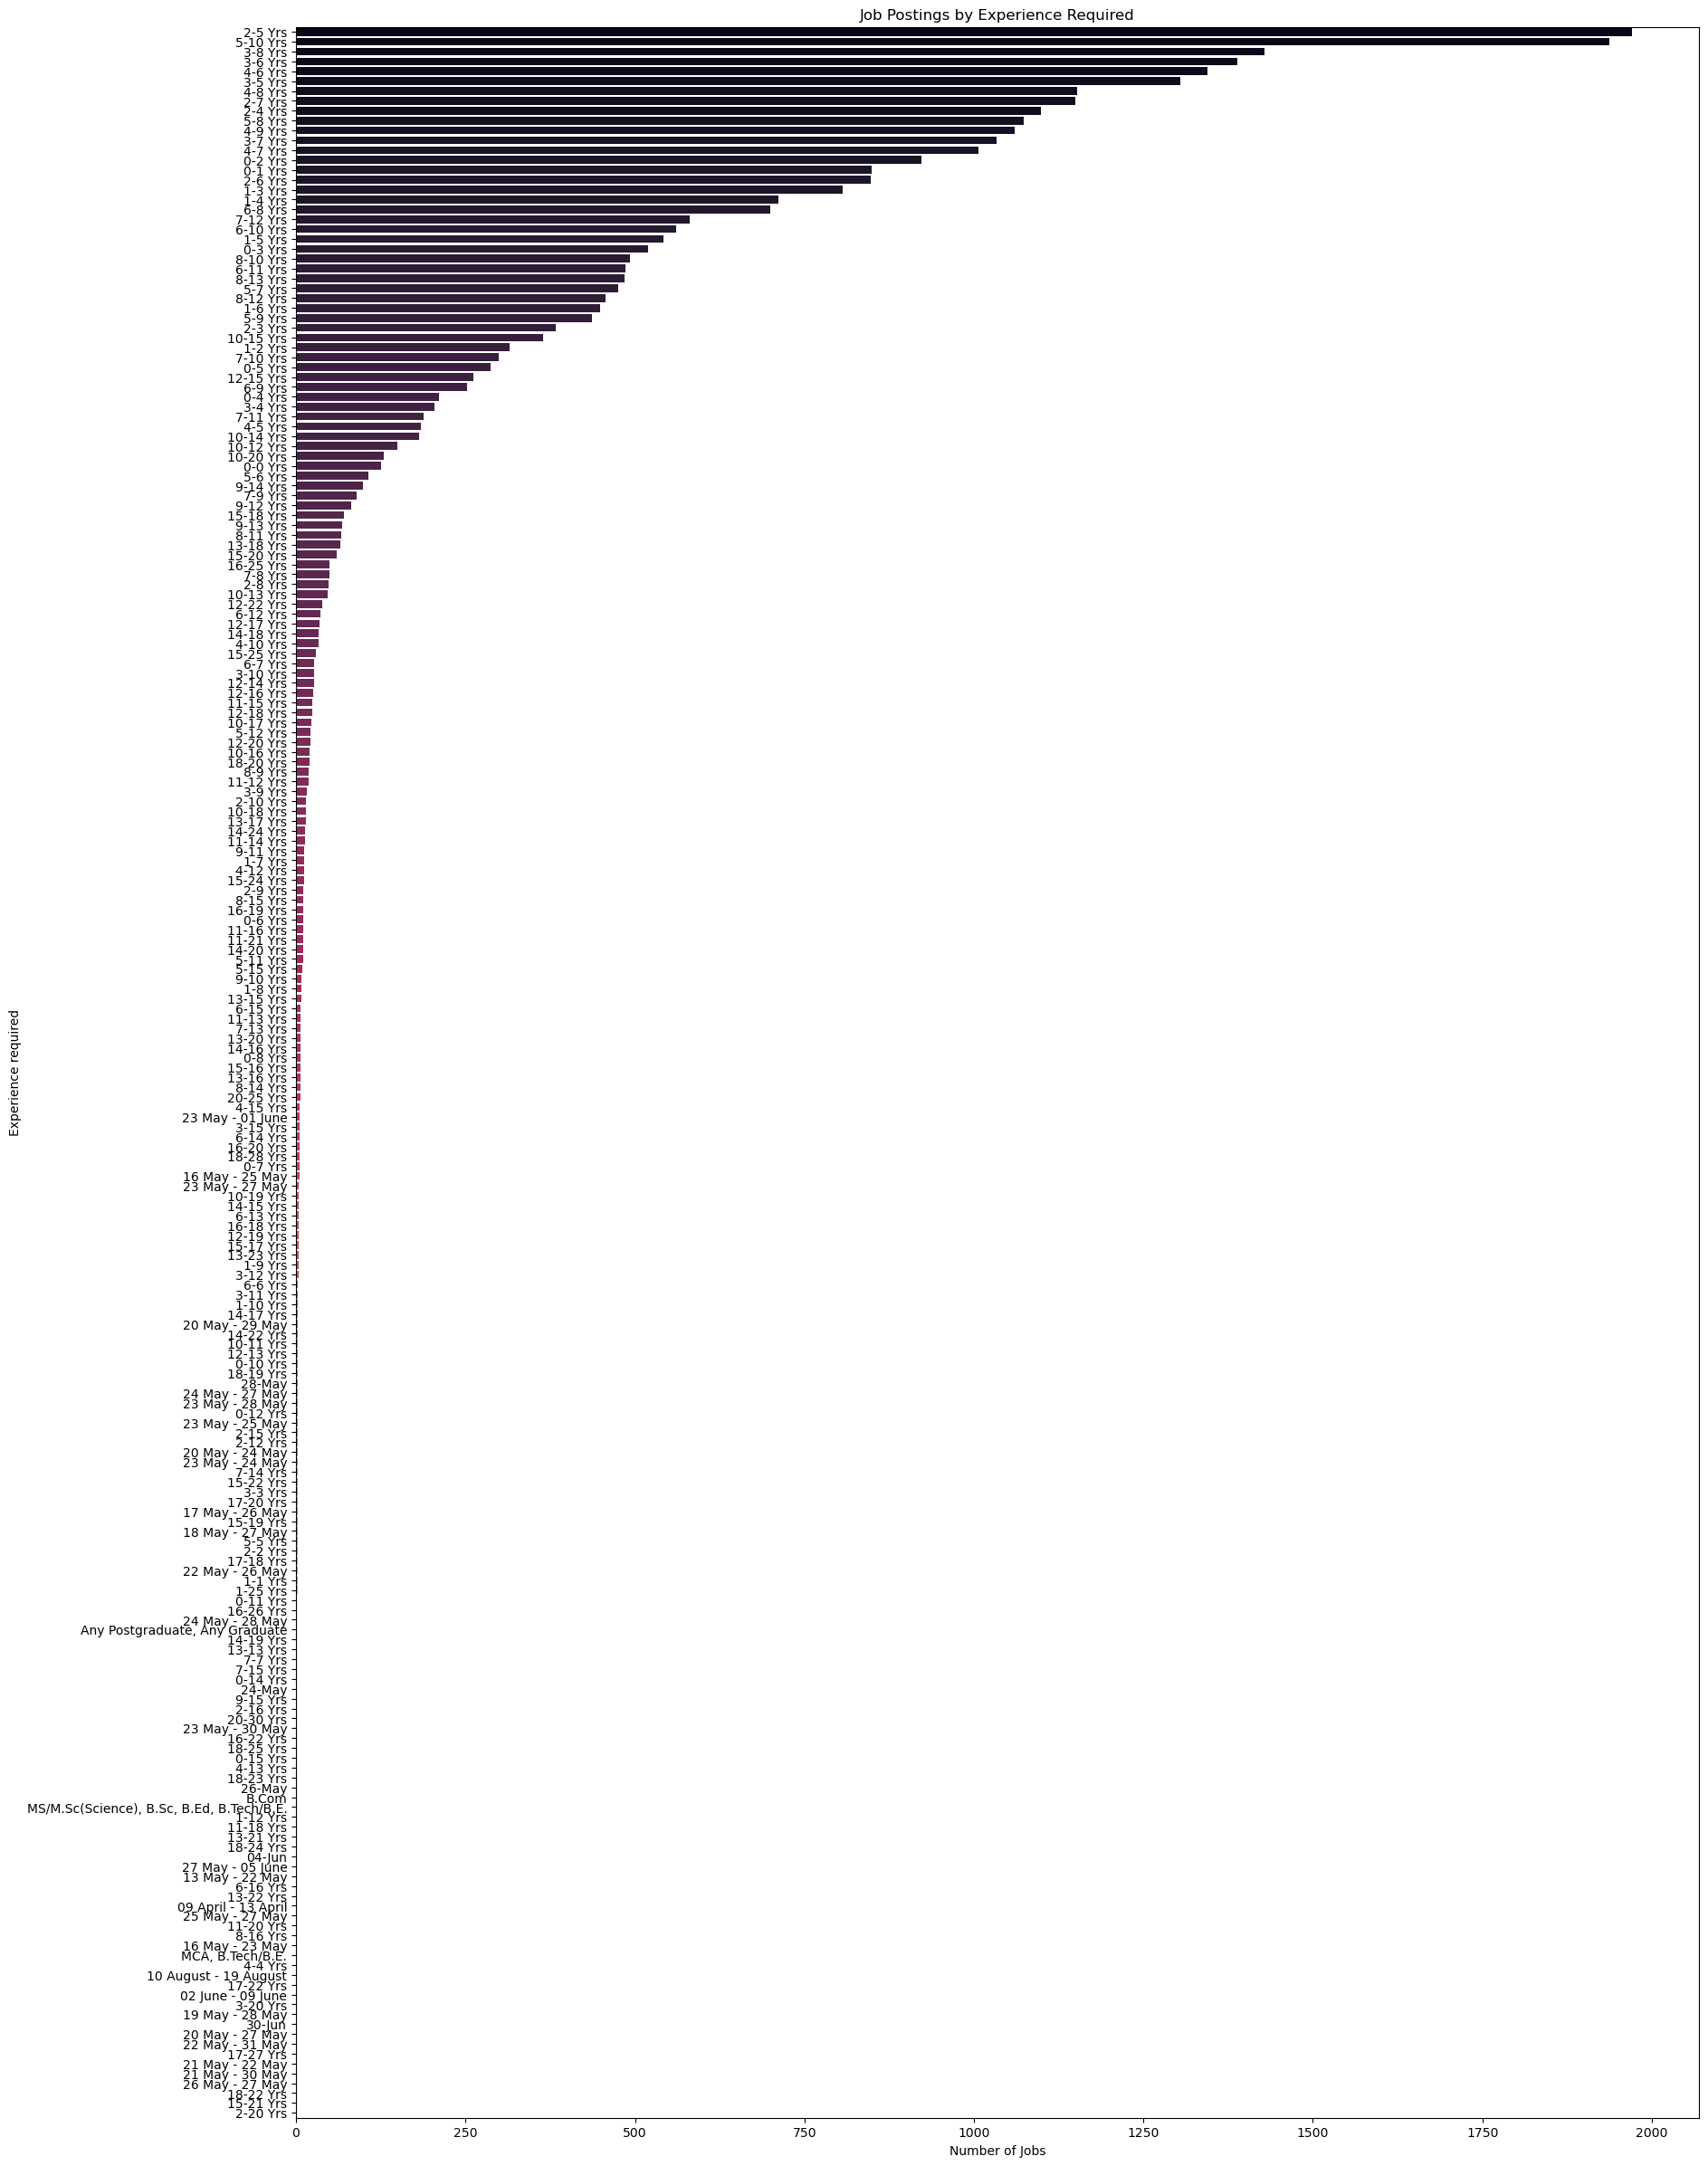

In [55]:
# Count the number of occurrences of each value in "Experience required"
experience_counts = df["Experience required"].value_counts()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(20, 30))
sns.barplot(x=experience_counts.values, y=experience_counts.index, ax=ax, palette="rocket")

# Add labels and titles
ax.set_xlabel("Number of Jobs")
ax.set_ylabel("Experience required")
ax.set_title("Job Postings by Experience Required")

plt.show()

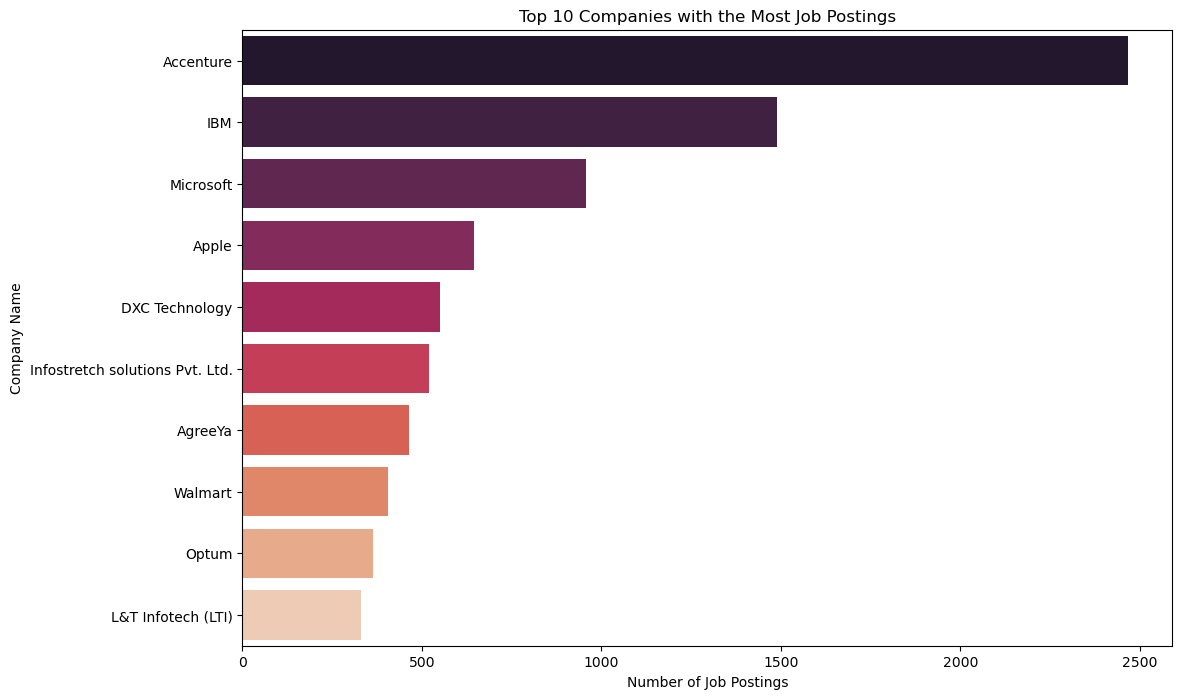

In [56]:
# Get the top 10 companies with the most job postings
top_companies = df['Company name'].value_counts().nlargest(10)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=top_companies.values, y=top_companies.index, ax=ax, palette="rocket")

# Add labels and title
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Company Name")
ax.set_title("Top 10 Companies with the Most Job Postings")

plt.show()

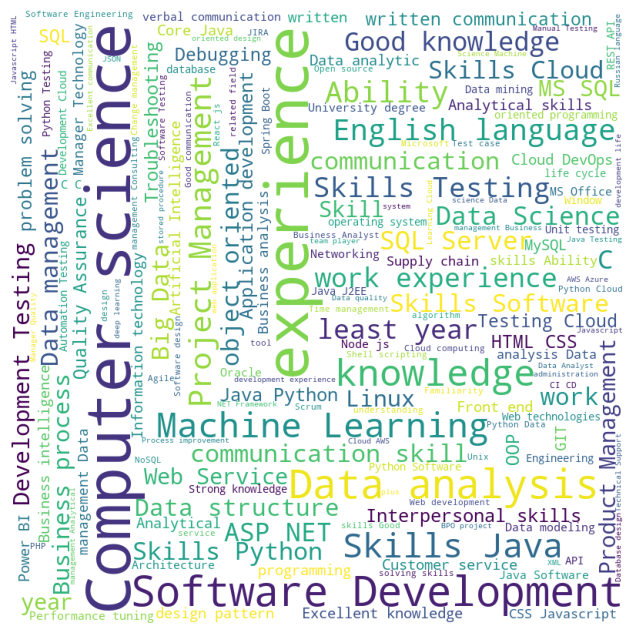

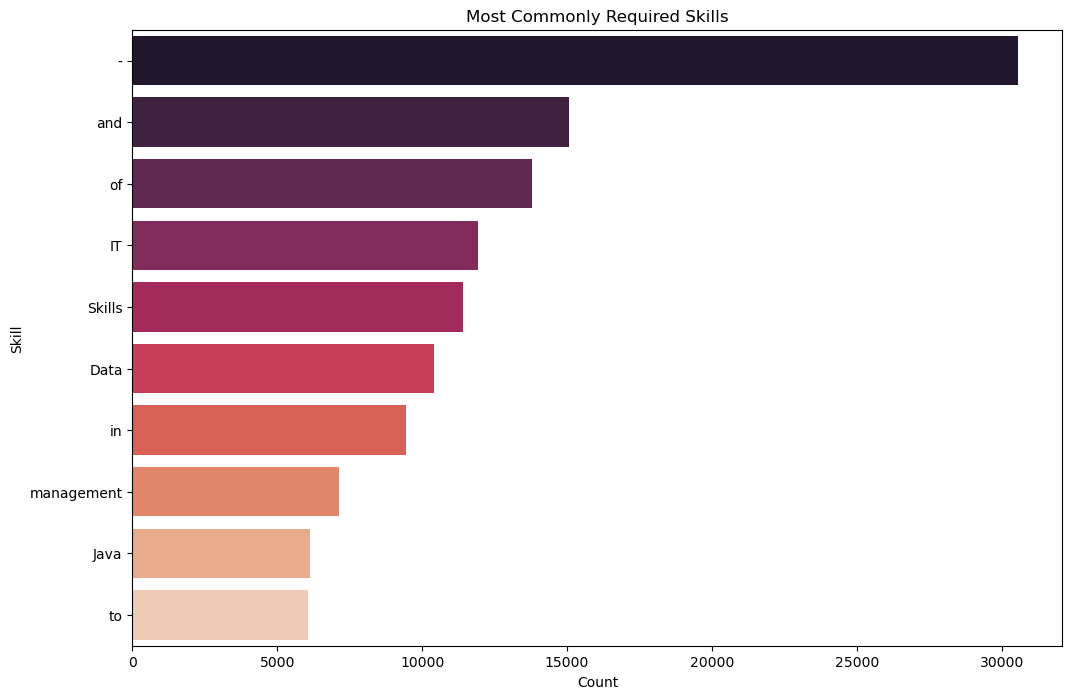

In [57]:
# Combine all the skills into a single string
skills_string = ' '.join(df['Required skills'].dropna().tolist())

# Create a word cloud of the skills
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(skills_string)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Create a bar chart of the most commonly required skills
skills = Counter(skills_string.split())
skills_df = pd.DataFrame.from_dict(skills, orient='index', columns=['count'])
skills_df = skills_df.nlargest(10, 'count')

plt.figure(figsize=(12, 8))
sns.barplot(x=skills_df['count'], y=skills_df.index, palette="rocket")
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Most Commonly Required Skills')
plt.show()

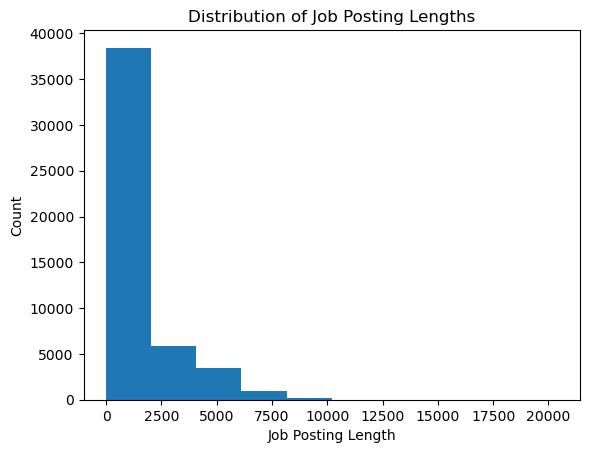

In [58]:
# Calculate the length of each job posting in characters
df['Job Posting Length'] = df['Job description'].str.len()

# Plot a histogram of job posting length
import matplotlib.pyplot as plt
plt.hist(df['Job Posting Length'])
plt.xlabel('Job Posting Length')
plt.ylabel('Count')
plt.title('Distribution of Job Posting Lengths')
plt.show()

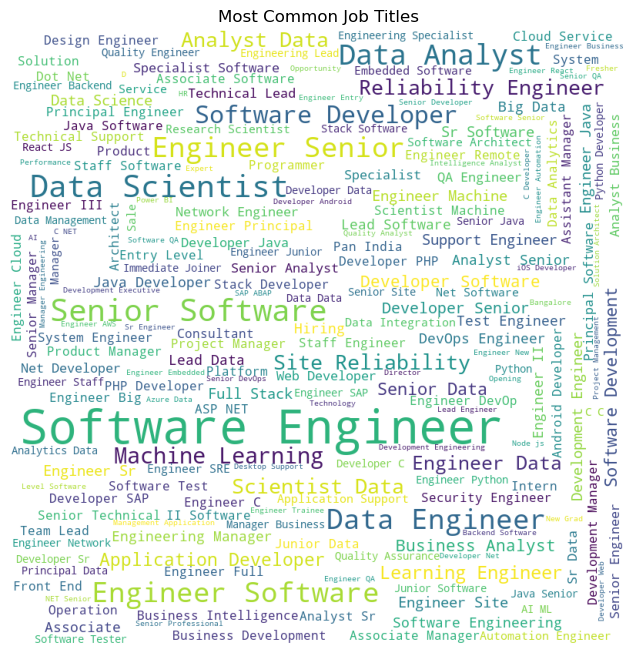

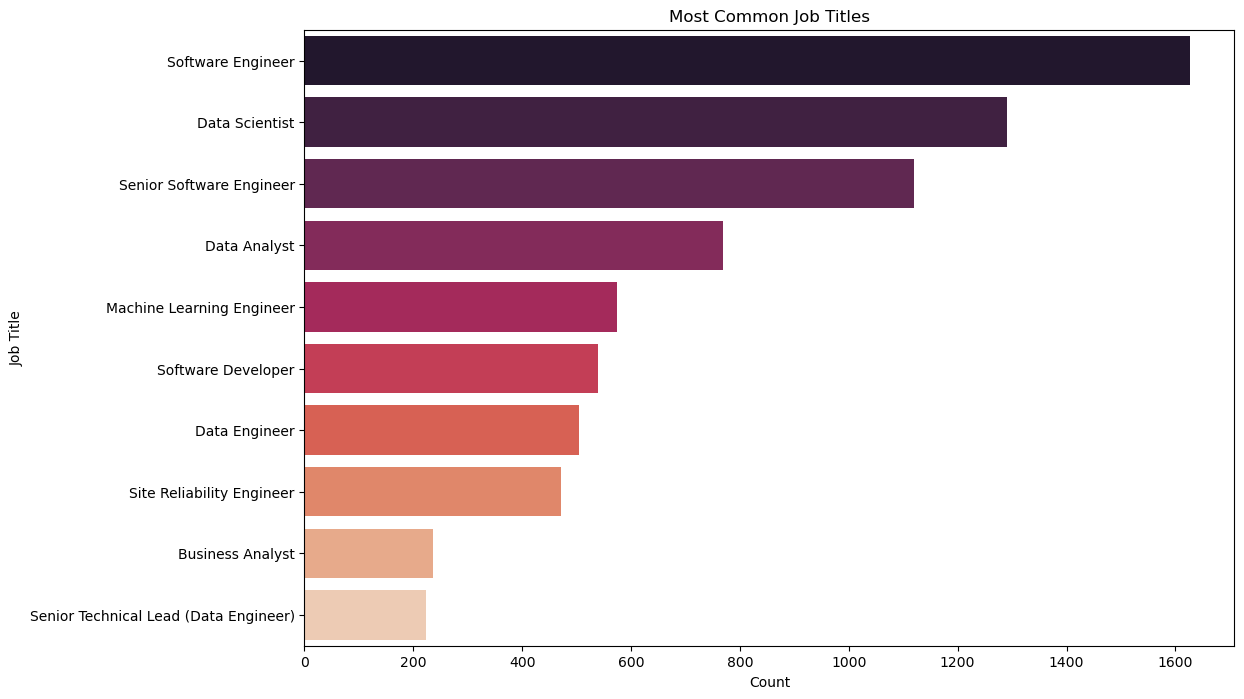

In [59]:
# Create a word cloud of job titles
titles_string = ' '.join(df['Job post'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(titles_string)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common Job Titles')
plt.show()

# Create a bar chart of the most common job titles
top_titles = df['Job post'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="rocket")
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Most Common Job Titles')
plt.show()

## III- Cleaning the Data
   Cleaning the data is an essential step in data analysis and involves the process of identifying and correcting errors, inconsistencies, and missing or irrelevant data in a dataset. This process is necessary to ensure the quality and accuracy of the data and to prevent any misleading or incorrect conclusions being drawn from the analysis. Cleaning the data typically involves several tasks, such as removing duplicates, filling in missing values, correcting formatting errors, and removing outliers. It is important to carefully document and track any changes made to the data during the cleaning process to ensure transparency and reproducibility. Overall, cleaning the data is a crucial step in any data analysis project and requires careful attention to detail and a thorough understanding of the data and its characteristics.

### Eliminating Redundancies
Eliminating redundancies involves removing unnecessary or duplicate information from a dataset. This process can improve the quality and efficiency of the data and reduce the risk of errors or inconsistencies in analysis. It can be done by identifying and removing duplicate records or by analyzing patterns in the data. The reduction in the number of rows from 49,714 to 43,443 after eliminating redundancies suggests that there were a significant number of duplicate records in the original dataset.

In [68]:
# Dropping Duplicated columns
df = df.drop_duplicates()
len(df)

43644

### Eliminating NaN Values
Eliminating NaN (Not a Number) values is an important step in data cleaning that involves removing any missing or invalid data from a dataset. This can be done by filling in the missing values or removing the rows/columns containing NaN values, depending on the amount and importance of the missing data. The process helps to prevent errors and biased results in the analysis.

In [69]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                   0
Company name               1
Job description          808
Required skills        13114
Location                   0
Salary                  6565
Company rating         14555
Company review         16235
Experience required    16235
dtype: int64


##### Company reviews

In [70]:
import re
import pandas as pd

# define a function to convert string to float
def str_to_float(val):
    num_string = re.findall(r'\d+\.*\d*', str(val))
    if num_string:
        return float(num_string[0])
    else:
        return None

# apply the function to the "Company review" column
df.loc[:, 'Company review'] = df['Company review'].apply(str_to_float)

# replace missing values with the median of the column
median_val = df['Company review'].median()
df.loc[:, 'Company review'] = df['Company review'].fillna(median_val)

C:\Users\Mega-Pc\AppData\Local\Temp\ipykernel_1952\4004542193.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Company review'] = df['Company review'].apply(str_to_float)
C:\Users\Mega-Pc\AppData\Local\Temp\ipykernel_1952\4004542193.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Company review'] = df['Company review'].fillna(median_val)


In [71]:
# Check data types
print("Data types:")
print(df.dtypes)

Data types:
Job post                object
Company name            object
Job description         object
Required skills         object
Location                object
Salary                  object
Company rating         float64
Company review         float64
Experience required     object
dtype: object


#### Numerical Features
In the preprocessing of the numerical features for our analysis, we converted the "company reviews" feature from an object type to a float type to allow for numerical operations. Additionally, we observed missing values in the "company rating" feature and used the mean imputation method to replace these values. This process helps to ensure the accuracy and completeness of our data and allows for more reliable analysis and modeling. It is important to note that imputation methods should be chosen carefully and documented thoroughly to maintain transparency and reproducibility in the data analysis process.

##### Company rating

In [72]:
# Calculate the mean of the non-missing values in the "company rating" column
mean_rating = df['Company rating'].mean()

# Replace the NaN values with the mean value
df['Company rating'].fillna(mean_rating, inplace=True)
# Checking for any NaN Values
nan_values = df['Company rating'].isna().sum()
print(f"Number of NaN values in the 'company rating' column: {nan_values}")

Number of NaN values in the 'company rating' column: 0


C:\Users\Mega-Pc\AppData\Local\Temp\ipykernel_1952\551463521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company rating'].fillna(mean_rating, inplace=True)


In [73]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                   0
Company name               1
Job description          808
Required skills        13114
Location                   0
Salary                  6565
Company rating             0
Company review             0
Experience required    16235
dtype: int64


#### Categorical Features

##### Required Skills

In [74]:
# Define a function to impute missing values in the "Required skills" feature based on the "Job post" feature
def impute_required_skills(row):
    if pd.isna(row['Required skills']):
        if row['Job post'] == 'Data Scientist':
            return 'SQL, machine learning, data cleaning'
        elif row['Job post'] == 'Software Engineer':
            return 'Java, Python, web development, AWS'
        elif row['Job post'] == 'Senior Software Engineer':
            return 'C++, software architecture, agile development'
        elif row['Job post'] == 'Data Analyst':
            return 'SQL, data visualization, Excel'
        elif row['Job post'] == 'Machine Learning Engineer':
            return 'Python, deep learning, computer vision'
        elif row['Job post'] == 'Data Engineer':
            return 'SQL, ETL, big data'
        elif row['Job post'] == 'Site Reliability Engineer':
            return 'Linux, automation, cloud infrastructure'
        elif row['Job post'] == 'Business Analyst':
            return 'Requirements gathering, data analysis, stakeholder management'
        elif row['Job post'] == 'Senior Technical Lead(Data Engineer)':
            return 'ETL, data warehousing, data modeling'
        else:
            return None
    else:
        return row['Required skills']

# Apply the imputation function to the DataFrame to impute missing values in the "Required skills" feature
df['Required skills'] = df.apply(impute_required_skills, axis=1)

C:\Users\Mega-Pc\AppData\Local\Temp\ipykernel_1952\2777900598.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Required skills'] = df.apply(impute_required_skills, axis=1)


In [75]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                   0
Company name               1
Job description          808
Required skills         9642
Location                   0
Salary                  6565
Company rating             0
Company review             0
Experience required    16235
dtype: int64


In [59]:
# get the counts of each unique job post
#job_counts = df['Job post'].value_counts()

# print the job post and its count
#for job, count in job_counts.iteritems():
    #print(f"{job}: {count} times")

In [76]:
import spacy

# Load the pre-trained English language model
nlp = spacy.load('en_core_web_sm')

def is_skill(span):
    """
    Determine if a given Spacy span is a skill-related noun or not
    """
    root_token = span.root
    if root_token.pos_ == 'NOUN' and (root_token.dep_ == 'amod' or root_token.dep_ == 'compound' or root_token.dep_ == 'nsubj'):
        return True
    else:
        return False
    
# Define a function to extract the required skills from a job post
def extract_skills(job_post):
    # Parse the job post text with spaCy
    doc = nlp(job_post)
    # Extract noun chunks and individual nouns that are skill-related
    noun_chunks = [chunk.text for chunk in doc.noun_chunks if is_skill(chunk)]
    nouns = [ent.text for ent in doc.ents if is_skill(ent)]
    # Combine the noun chunks and nouns into a single list of unique skills
    skills = list(set(noun_chunks + nouns))
    # Return the skills as a string separated by commas
    return ', '.join(skills)


# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    # If the required skills are missing
    if pd.isnull(row['Required skills']):
        # Extract the required skills from the job post
        required_skills = extract_skills(row['Job post'])
        # Impute the required skills into the DataFrame
        df.at[i, 'Required skills'] = required_skills

In [77]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                   0
Company name               1
Job description          808
Required skills            0
Location                   0
Salary                  6565
Company rating             0
Company review             0
Experience required    16235
dtype: int64


In [83]:
# Filter for job posts that mention "Senior Site Reliability Engineer"
senior_sre_posts = df[df['Job post'].str.contains('Senior Site Reliability Engineer', case=False)]
# Display the Required skills column for these job posts
print(senior_sre_posts['Required skills'])

244      S/4HANA Cloud\nIT Skills\nCloud\nSAP\nComputer...
14107    Unix\nIT Skills\nJava\nJ2EE\nCloud\nJenkins\nS...
18277    Go\nLinux administration\nLinux\nGoogle Cloud ...
18316    Terraform\nGoogle Cloud\nBash\nMicrosoft Azure...
19314    Linux\nIT Skills\nPython\nCloud\nDevOps\nAWS\n...
19453    IT Skills\nJava\nPython\nCloud\nUnix\nC++\nAut...
21143    IT Skills\nJava\nPython\nCloud\nElastic Search...
21236    Unix\nSAN\nAutomation\nCompliance\nLinux\nNetw...
21247    IT Skills\nCloud\nBig Data\nAzure\nComputer sc...
24055    Computer science\nData analysis\nCoding\nEngin...
28645    Automation\nLinux\nMySQL\nAgile\nApplication d...
Name: Required skills, dtype: object


In [80]:
# Drop rows where 'Required skills' column is empty
df = df[df['Required skills'].apply(lambda x: len(x.strip()) > 0)]

In [84]:
#df['Required skills'==''].sum()

# Drop Salary

In [81]:
df = df.drop('Salary', axis=1)

In [85]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                  0
Company name              1
Job description         477
Required skills           0
Location                  0
Company rating            0
Company review            0
Experience required    6640
dtype: int64


# Experience

In [86]:
def impute_experience(df):
    # If Experience Required is not missing, return the value
    df.loc[pd.notnull(df['Experience required']), 'Experience required'] = df['Experience required']
    
    # If Job Post contains "Senior", set experience to 10 years or more
    df.loc[df['Job post'].str.contains('Senior', case=False, na=False), 'Experience required'] = '10 + Yrs'
    
    # If Job Post contains "Junior" or "Trainee", set experience to 0-2 years
    df.loc[df['Job post'].str.contains('Junior|Trainee', case=False, na=False), 'Experience required'] = '0-2 Yrs'
    
    # If none of the above conditions are met and there are non-null values in the 'Experience Required' feature, set experience to the median value
    if pd.notnull(df['Experience required']).any():
        median_exp = df['Experience required'].dropna().apply(lambda x: np.mean([int(i) for i in x.split() if i.isdigit()])).median()
        df['Experience required'].fillna(f"{int(median_exp)} Yrs", inplace=True)
    else:
        # If there are no non-null values in the 'Experience Required' feature, set experience to 'Not specified'
        df['Experience required'].fillna('Not specified', inplace=True)
    
    return df

# Call the impute_experience function to impute missing values
df = impute_experience(df)



C:\Users\Mega-Pc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [87]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post                 0
Company name             1
Job description        477
Required skills          0
Location                 0
Company rating           0
Company review           0
Experience required      0
dtype: int64


In [20]:
#df = df.drop('Job Posting Length', axis=1)

# Job Description

In [88]:
# Filter the job postings dataset to show only the rows with NaN values in the Job description column
job_postings_with_nan = df[df['Job description'].isna()]

# Display the filtered dataset
job_postings_with_nan

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
33334,Software Developer,Yerevan Brandy Company,NaN,- University degree; economical background is ...,"Yerevan, Armenia",3.95215,147.0,10 Yrs
33335,Network Administrator,NetCall Communications,NaN,"- Excellent knowledge of Windows 2000 Server, ...","Yerevan, Armenia",3.95215,147.0,10 Yrs
33337,Demographic Analysis Workshop,Caucasus Research Resource Center - Armenia,NaN,Participants should be mid-level professionals...,"Yerevan, Armenia\r\nDESCRIPTION: Demographic...",3.95215,147.0,10 Yrs
33338,Programmer,CIT Ltd.,NaN,- Work experience of at least two years; \r\n-...,"Yerevan, Armenia",3.95215,147.0,10 Yrs
33369,Network Administrator,"""Fordilling"" Holding Co.",NaN,"- Complete higher education, \r\n- Excellent k...","Yerevan, Armenia",3.95215,147.0,10 Yrs
...,...,...,...,...,...,...,...,...
49651,Software Engineer,Uber,NaN,"Java, Python, web development, AWS","Seattle, WA",3.95215,147.0,10 Yrs
49663,Data Scientist,Gridware,NaN,"SQL, machine learning, data cleaning","Walnut Creek, CA",3.95215,147.0,10 Yrs
49664,Data Scientist,The Home Depot,NaN,"SQL, machine learning, data cleaning","Smyrna, GA",3.95215,147.0,10 Yrs
49674,Data Scientist,CVS Health,NaN,"SQL, machine learning, data cleaning","New York, NY",3.95215,147.0,10 Yrs


In [89]:
missing = df.isna().sum(axis=1)
missing

0        0
1        0
2        0
3        0
4        0
        ..
49701    0
49706    0
49707    0
49709    0
49713    0
Length: 34049, dtype: int64

In [90]:
# Drop rows that have only missing values in 'Job description' column
df.dropna(subset=['Job description'], how='all', inplace=True)

In [91]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post               0
Company name           1
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64


In [92]:
df

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
0,Information Technology Executive,Marriott,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,Bhopal,4.20000,2907.0,0-3 Yrs
1,Associate Director-Information Technology(SAP),Unacademy,Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,"Noida, Greater Noida",3.40000,544.0,5-15 Yrs
2,Lead - Information Technology,EchoIndia,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,Delhi / NCR,4.00000,20.0,11-13 Yrs
3,Information Technology - Project Manager,Tata International,Should be able to manage a project using vario...,project management\nit projects\ninformation t...,Mumbai (All Areas),4.10000,287.0,4-8 Yrs
4,Information Technology Trainee,Stefanini,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,Noida,3.80000,75.0,0-2 Yrs
...,...,...,...,...,...,...,...,...
49701,Site Reliability Engineer,Zoom,Primary Responsibilities Develop automation to...,"Linux, automation, cloud infrastructure","San Jose, CA",3.95215,147.0,10 Yrs
49706,Site Reliability Engineer,VBeyond Corporation,"Hello, Greetings! This is Akash Kumar from VBe...","Linux, automation, cloud infrastructure","Mountain View, CA",3.95215,147.0,10 Yrs
49707,Site Reliability Engineer,Blizzard Entertainment,Team Name IT – Site Reliability Engineering Jo...,"Linux, automation, cloud infrastructure","Irvine, CA",3.95215,147.0,10 Yrs
49709,Site Reliability Engineer,Sky Solutions,Primary Skills: 1. Good hands on experience on...,"Linux, automation, cloud infrastructure","Malvern, PA",3.95215,147.0,10 Yrs


## Company Name

In [93]:
df.dropna(subset=['Company name'], inplace=True)

In [94]:
df

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
0,Information Technology Executive,Marriott,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,Bhopal,4.20000,2907.0,0-3 Yrs
1,Associate Director-Information Technology(SAP),Unacademy,Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,"Noida, Greater Noida",3.40000,544.0,5-15 Yrs
2,Lead - Information Technology,EchoIndia,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,Delhi / NCR,4.00000,20.0,11-13 Yrs
3,Information Technology - Project Manager,Tata International,Should be able to manage a project using vario...,project management\nit projects\ninformation t...,Mumbai (All Areas),4.10000,287.0,4-8 Yrs
4,Information Technology Trainee,Stefanini,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,Noida,3.80000,75.0,0-2 Yrs
...,...,...,...,...,...,...,...,...
49701,Site Reliability Engineer,Zoom,Primary Responsibilities Develop automation to...,"Linux, automation, cloud infrastructure","San Jose, CA",3.95215,147.0,10 Yrs
49706,Site Reliability Engineer,VBeyond Corporation,"Hello, Greetings! This is Akash Kumar from VBe...","Linux, automation, cloud infrastructure","Mountain View, CA",3.95215,147.0,10 Yrs
49707,Site Reliability Engineer,Blizzard Entertainment,Team Name IT – Site Reliability Engineering Jo...,"Linux, automation, cloud infrastructure","Irvine, CA",3.95215,147.0,10 Yrs
49709,Site Reliability Engineer,Sky Solutions,Primary Skills: 1. Good hands on experience on...,"Linux, automation, cloud infrastructure","Malvern, PA",3.95215,147.0,10 Yrs


In [95]:
# Count the number of NaN values for each feature
nan_counts = df.isna().sum()
print(nan_counts)

Job post               0
Company name           0
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64


In [96]:
# Count the number of times "Site Reliability Engineer" appears in each column of the dataframe
counts = df[['Job post', 'Company name', 'Location']].apply(lambda x: x.str.count("Site Reliability Engineer")).sum()
print(counts)

Job post        455
Company name      0
Location          0
dtype: int64


## Text Cleaning
     lower casing
     removing stop words and punctuation
     stemming
     tok, stand

In [97]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Mega-
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [98]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Mega-
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mega-
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mega-
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
# define the cleaning functions
import string

def clean_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if word not in string.punctuation]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [100]:
# create a new column containing the cleaned text for each feature
df['Job post'] = df['Job post'].apply(lambda x: clean_text(x))

In [101]:
# create a new column containing the cleaned text for each feature
df['Company name'] = df['Company name'].apply(lambda x: clean_text(x))

In [102]:
# create a new column containing the cleaned text for each feature
df['Job description'] = df['Job description'].apply(lambda x: clean_text(x))

In [103]:
# create a new column containing the cleaned text for each feature
df['Required skills'] = df['Required skills'].apply(lambda x: clean_text(x))

In [104]:
# create a new column containing the cleaned text for each feature
df['Location'] = df['Location'].apply(lambda x: clean_text(x))

In [105]:
# create a new column containing the cleaned text for each feature
df['Experience required'] = df['Experience required'].apply(lambda x: clean_text(x))

In [106]:
df.head()

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
0,inform technolog execut,marriott,posit summari troubleshoot resolv technic prob...,supervisor administr tactic plan execut inform...,bhopal,4.2,2907.0,0-3 yr
1,associ director-inform technolog sap,unacademi,support manag time deliveri custom develop myj...,relationship manag sap mm pharma analyt ipr sc...,noida greater noida,3.4,544.0,5-15 yr
2,lead inform technolog,echoindia,experi design modern rest api scale horizont v...,spring docker system design paa microservic ar...,delhi ncr,4.0,20.0,11-13 yr
3,inform technolog project manag,tata intern,abl manag project use variou methodolog like w...,project manag project inform technolog project...,mumbai area,4.1,287.0,4-8 yr
4,inform technolog traine,stefanini,resourc expect cross skill\train support multi...,pop train basic network intern infrastructur i...,noida,3.8,75.0,0-2 yr


In [107]:
#import spacy
#nlp = spacy.load('en_core_web_sm')


#def dependency_parse(text_list):
#    parsed_list = []
#    for text in text_list:
#        if isinstance(text, tuple):
#            text = text[0]
#        doc = nlp(text)
#        parsed_text = ' '.join([token.text for token in doc])
#        parsed_list.append(parsed_text)
#    return parsed_list

In [110]:
# apply the POS tagger to each column of the dataset
# df['Job post'] = df['Job post'].apply(dependency_parse)

In [111]:
# df['Company name'] = df['Company name'].apply(dependency_parse)

In [112]:
# df['Requierd skills'] = df['Required skills'].apply(dependency_parse)

In [113]:
# df['Location'] = df['Location'].apply(dependency_parse)

In [114]:
# df

In [116]:
# import nltk
# nltk.download('averaged_perceptron_tagger') # download the POS tagger if you haven't already


# define a function to perform POS tagging on a given text
# def pos_tagging(text):
#     tokens = nltk.word_tokenize(text) # tokenize the text into words
#     tagged_tokens = nltk.pos_tag(tokens) # perform POS tagging on the tokens
#     return tagged_tokens

In [ ]:
# apply the POS tagger to each column of the dataset
df['Job post'] = df['Job post'].apply(pos_tagging)

In [ ]:
df['Comapny name''] = df['Comapny name'].apply(pos_tagging)

In [ ]:
df['Job description'] = df['Job description'].apply(pos_tagging)

In [ ]:
df['Required skills'] = df['Required skills'].apply(pos_tagging)

In [ ]:
df['Location'] = df['Location'].apply(pos_tagging)